# SYMMETRIC CRYPTOGRAPHY

## OVERVIEW

- Are algorithms that use the same key for encryption and decryption.

- **Goal**: Use short keys to securely and efficiently send long messages.

- **Example**: (AES) Advanced Encryption Standard

- **Types**: Block ciphers and Stream Ciphers

### 1. Block Ciphers
- Break up a plaintext into fixed-length blocks and send each block through an encryption function together with a secret key. AES is an example of such a cipher.

### 2. Stream Ciphers
- Enrypt one byte of plaintext at a time, by XORing a pseudo-random keystream with the data.




## KEYED PERMUTATIONS

- AES performs a keyed permutation, meaning that it maps every possible input block to a unique output block with a key determining which permutation to perform.

- Using the same key, the permutation can be performed in reverse thus mapping output to input block.

- **NOTE: There should be a 1-1 correspoondence between input and output blocks i.e reversible mapping.**

- The mathematical term for a one-to-one correspondence is 
<span style='color:yellow'> bijection </span>

- Conversly, a function can be injective or surjective as shown below:

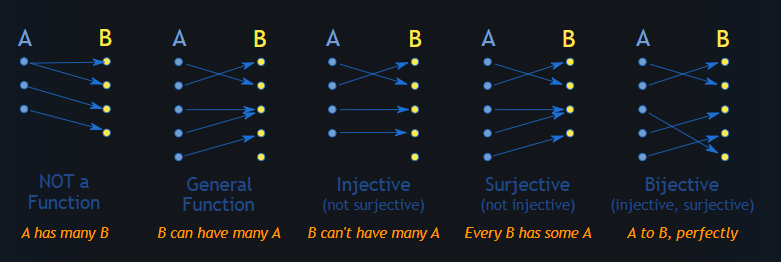

1. <span style='color:yellow'> Injective </span>: we won't have 2 or more As pointing to the same B. Many to One and One to Many is _not okay_, but we can have a B without a matching A. Is said to be **One to One**

2. <span style='color:yellow'> Surjective </span>: every B has __at least__ one matching A (maybe more than one), no B is left out. Can be **Many to One**

3. <span style='color:yellow'> Bijective </span>: means both injective and surjective as in a perfect pairing between the sets, each has a partner and no one is left out i.e uniqueness. Is called **One to One Correspondence**

## RESISTING BRUTE FORCE

- If a block cipher is secure there should be no way for an attacker to distinguish the output of the AES from a random permutation of bits and there should be no better way to undo the permutation than to simply bruteforce every possible key.

- A cipher is considered **broken** if there is an attack that takes less steps than bruteforce.

- The best single key attack against AES is called 
<span style='color:yellow'> **biclique attacks** </span> 
which exploits weaknesses that occur when keys are relatedin a specific way.

## STRUCTURE OF AES

- At a high level, *AES-128* begins with a _key schedule_ and then runs _10 rounds_ over a state.

- The starting state is just the plaintext block we want to encrypt, represented as a 4 x 4 matrix of bytes which is the passed through 10 rounds of invertible transformations.

### Phases of AES Encryption
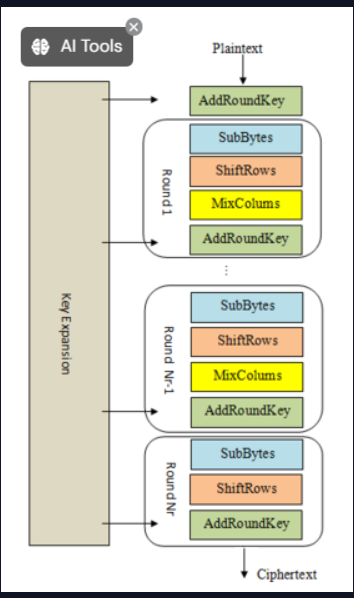

[Video Explanation of the AES Implementation](https://youtu.be/gP4PqVGudtg)

#### 1. <span style='color:yellow'> Key Expansion/Schedule </span>
From the 128 bit key, 11 separate 128 bit _round keys_ are derived where one is to be used in each _AddRoundKey Step_

#### 2. <span style='color:yellow'> Initial Key Addition </span>
_AddRoundKey Step_ - the bytes of the 1st round key are XORed with the bytes of the state

#### 3. <span style='color:yellow'> Round </span>
This phase is looped 10 times, for 9 main rounds and 1 final round.

1. SubBytes - each byte of the state is substituted for a different byte according to the _S-box table_

2. ShiftRows - the last three rows of the state matrix are transposed/ shifted over the row number i.e row 0 by 0, row 1 by 1,...

3. MixColumns - matrix multiplication is performed on the columns of the state, combining the 4 bytes in each column. _Skipped in final round_

4. AddRoundKey - the bytes of the current round key are XORed with the bytes of the state


 Write a matrix2bytes function to turn that matrix back into bytes, and submit the resulting plaintext as the flag.

In [1]:
matrix = [
    [99, 114, 121, 112],
    [116, 111, 123, 105]
]

OneD = [n for sub in matrix for n in sub]
OneD

[99, 114, 121, 112, 116, 111, 123, 105]

In [2]:
import numpy as np
matrix = np.array([
    [99, 114, 121, 112],
    [116, 111, 123, 105]
])
OneD_flatten = matrix.flatten()
OneD_flatten

array([ 99, 114, 121, 112, 116, 111, 123, 105])

In [3]:
def bytes2matrix(text):
    """ Converts a 16-byte array into a 4x4 matrix.  """
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    """ Converts a 4x4 matrix into a 16-byte array.  """
    return ''.join([chr(element) for sub in matrix for element in sub])
    


matrix = [
    [99, 114, 121, 112],
    [116, 111, 123, 105],
    [110, 109, 97, 116],
    [114, 105, 120, 125],
]

print(matrix2bytes(matrix))


crypto{inmatrix}


### Round Keys

- The general idea is that it takes in our 16 byte key and produces 11 4x4 matrices called round keys derived from our initial key. These allow AES to get extra mileage out of the single key provided.

- The _AddRoundKey Step_ XORs the current state with the current round key.

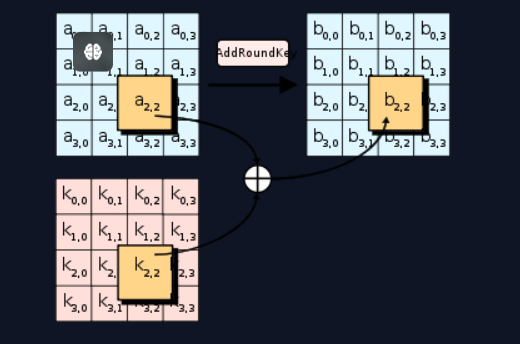

- This step also occurs as the final step of each round. This factor that makes it a "keyed permutation" is what makes it such an effective cipher as it jumbles the plaintext.

Complete the `add_round_key` function, then use the `matrix2bytes` function to get your next flag.


In [4]:
state = [
    [206, 243, 61, 34],
    [171, 11, 93, 31],
    [16, 200, 91, 108],
    [150, 3, 194, 51],
]

round_key = [
    [173, 129, 68, 82],
    [223, 100, 38, 109],
    [32, 189, 53, 8],
    [253, 48, 187, 78],
]
    
def add_round_key(s, k):
    return [[ s[i][j] ^ k[i][j] for j in range(4)] for i in range(4)]

print(matrix2bytes(add_round_key(state, round_key)))



crypto{r0undk3y}


### Confusion Through Substitution

The first step of each AES round is _SubBytes_ which involves taking each byte of the state matrix and subtituting it for a different byte in a preset 16x16 lookup table called <span style='color:yellow'> Substitution Box or S-Box</span>. It is implemented to ensure the **Confusion Property**: relationship between the ciphertext and key should be as complex as possible.

**Purpose of the S-Box**: transform the input in a way that is resistant to being approximated by linear or algebraic methods i.e high non-linearity 

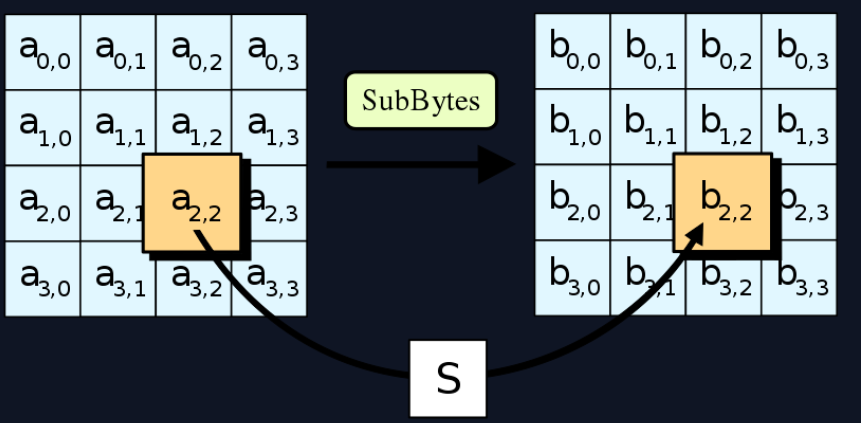

The simplest way to express the function is trhough the following high degree polynomial:

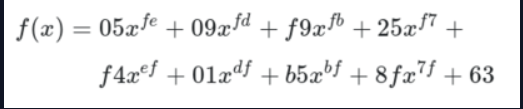



Implement sub_bytes, send the state matrix through the inverse S-box and then convert it to bytes to get the flag.

In [5]:
s_box = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

inv_s_box = (
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)

state = [
    [251, 64, 182, 81],
    [146, 168, 33, 80],
    [199, 159, 195, 24],
    [64, 80, 182, 255],
]

#  Iterate over each element in the state matrix.
# Replace each element with its corresponding value in the inv_s_box.
# Convert the result into bytes to obtain the flag.

def sub_bytes(s, sbox=s_box):
    for i in range(4):
        for j in range(4): 
            print(chr(sbox[s[i][j]]), end="")

print(sub_bytes(state, sbox=inv_s_box))



crypto{l1n34rly}None


### Diffusion through Permutation

- This discusses the significance of **Diffusion Property** in symmetric cryptography. The interplay of these operations helps create a more complex and secure cipher by spreading the influence of individual bytes throughout the entire state.

- We need to alternate substitutions by scrambling the state in an invertible way so that substitutions applied on one byte influence all other bytes in the state.

- The _ShiftRows_ and _MixColumns_ steps combine to achieve this.

1. <span style='color:yellow'> ShiftRows</span>
- The importance of this step is to avoid the columns being encrypted independently, in which case AES degenerates into four independent block ciphers.

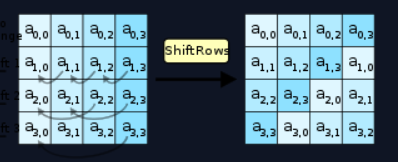

2. <span style='color:yellow'> MixColumns</span>
- This step performs matrix multiplication in Rijndaels's Galios field between the columns of the state matrix and a preset matrix. Each single byte of each column thus affects all the bytes of the resulting column.

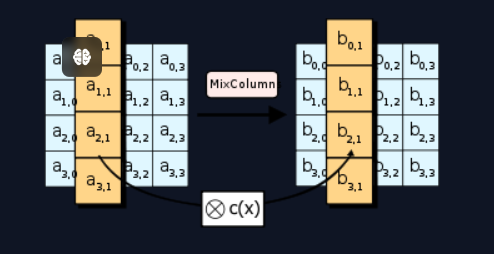

#### AES Galios Field
- In Rijndael's Galios field, all mathematical operations result in an 8-bit number thus addition, subtraction, multiplication and division are redefined.
- Addition and subtraction are performed by the exclusive or (XOR) operation.
- Multiplication is a bit more complicated:
    1. Take 2 8-bit numbers and an 8-bit product p.
    2. Set p to 0
    3. Make a copy of `a` and `b`
    4. Run the following loop 8 times
        4.1 If the low bit of `b` is set, `p` XOR `a`
        4.2 Keep track of whether the MSB of `a` is set to 1
        4.3 Rotate `a` one bit to the left, discarding the MSB, making the LSB have a value of zero
        4.4 If `a`'s MSB had a value of 1 prior to this rotation, `a` XOR `0x1b`
        4.5 Rotate `b` one bit to the right, discarding the LSB, making the MSB have a value of zero
    5. The product `p` now has the the product of `a` and `b`

    - Example:
    - `p` = 0, `a` = 7, `b` = 3
    Iteration 1
    1. LSB of `b` is 1, `p` = `p` XOR `a` = 7
    2. `a` is rotated one bit to the left, `a` = 14
    3. `a` MSB != 1 thus no XOR with `0x1b`
    4. `b` is rotated one bit to the right, `b` = 1

    Iteration 2
    1. LSB of `b` is 1, `p` = `p` XOR `a` = 9
    2. `a` is rotated one bit to the left, `a` = 28
    3. `a` MSB != 1 thus no XOR with `0x1b`
    4. `b` is rotated one bit to the right, `b` = 0

    Repeat this 6 more times, in this case no more changes occur as b is 0 thus product won't change again.

    Sample Code:

    `unsigned char gmul(unsigned char a, unsigned char b) {
	unsigned char p = 0;
	unsigned char counter;
	unsigned char hi_bit_set;
        for(counter = 0; counter < 8; counter++) {
            if((b & 1) == 1) 
                p ^= a;
            hi_bit_set = (a & 0x80);
            a <<= 1;
            if(hi_bit_set == 0x80) 
                a ^= 0x1b;		
            b >>= 1;
        }
        return p;
    }` 

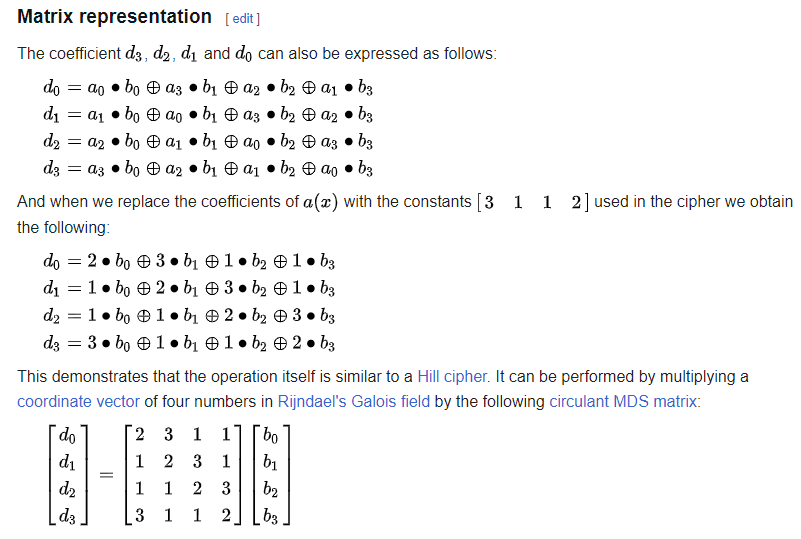






We've provided code to perform MixColumns and the forward ShiftRows operation. After implementing `inv_shift_rows`, take the state, run `inv_mix_columns` on it, then `inv_shift_rows`, convert to bytes and you will have your flag.

In [6]:
def shift_rows(s):
    s[0][1], s[1][1], s[2][1], s[3][1] = s[1][1], s[2][1], s[3][1], s[0][1]
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    s[0][3], s[1][3], s[2][3], s[3][3] = s[3][3], s[0][3], s[1][3], s[2][3]


def inv_shift_rows(s):
    s[0][1], s[1][1], s[2][1], s[3][1] = s[3][1], s[0][1], s[1][1], s[2][1]
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    s[0][3], s[1][3], s[2][3], s[3][3] = s[1][3], s[2][3], s[3][3], s[0][3]


# learned from http://cs.ucsb.edu/~koc/cs178/projects/JT/aes.c
xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)


def mix_single_column(a):
    # see Sec 4.1.2 in The Design of Rijndael
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)


def mix_columns(s):
    for i in range(4):
        mix_single_column(s[i])


def inv_mix_columns(s):
    # see Sec 4.1.3 in The Design of Rijndael
    for i in range(4):
        u = xtime(xtime(s[i][0] ^ s[i][2]))
        v = xtime(xtime(s[i][1] ^ s[i][3]))
        s[i][0] ^= u
        s[i][1] ^= v
        s[i][2] ^= u
        s[i][3] ^= v

    mix_columns(s)


state = [
    [108, 106, 71, 86],
    [96, 62, 38, 72],
    [42, 184, 92, 209],
    [94, 79, 8, 54],
]

print(state)

inv_mix_columns(state)
print(state)

inv_shift_rows(state)
print(state)

print(matrix2bytes(state))


[[108, 106, 71, 86], [96, 62, 38, 72], [42, 184, 92, 209], [94, 79, 8, 54]]
[[99, 111, 102, 125], [116, 102, 82, 112], [49, 51, 121, 100], [115, 114, 123, 85]]
[[99, 114, 121, 112], [116, 111, 123, 100], [49, 102, 102, 85], [115, 51, 82, 125]]
crypto{d1ffUs3R}


### Bringing It All Together

As we have implemented all the steps from _SubBytes_ (to provide confusion) and _ShiftRows_ and _MixColumns_ (to provide diffusion) sjowing jow these properties work togethre to repeatedly circulate non-linear transformations over the state.

_AddRoundKey_ seeds the key into the network making it a keyed permutation cipher.

Decryption involves performing the steps in reverse while applying the inverse operations. The _KeyExpansion_ still needs to be run first, and the round keys used in reverse order.

We've provided the key expansion code, and ciphertext that's been properly encrypted by AES-128. Copy in all the building blocks you've coded so far, and complete the `decrypt` function that implements the steps shown in the diagram. The decrypted plaintext is the flag

**Explanation of Decryption Steps**

Key Expansion: The key is expanded using expand_key, generating a list of round keys.

Initial Round: The add_round_key operation is performed with the last round key.

Inverse Rounds: For each round:

    1. Inverse ShiftRows: Reverses the row shifting operation.

    2. Inverse SubBytes: Reverses the byte substitution using the inverse S-box.

    3. AddRoundKey: XORs the state with the corresponding round key.

    4. Inverse MixColumns: Reverses the column mixing operation (skipped in the last round).
    
Final Round: The last round only involves InverseShiftRows, InverseSubBytes, and AddRoundKey (no InverseMixColumns).

In [7]:
N_ROUNDS = 10

def expand_key(master_key):
    """
    Expands and returns a list of key matrices for the given master_key.
    """

    # Round constants https://en.wikipedia.org/wiki/AES_key_schedule#Round_constants
    r_con = (
        0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
        0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
        0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
        0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39,
    )

    # Initialize round keys with raw key material.
    key_columns = bytes2matrix(master_key)
    iteration_size = len(master_key) // 4

    # Each iteration has exactly as many columns as the key material.
    i = 1
    while len(key_columns) < (N_ROUNDS + 1) * 4:
        # Copy previous word.
        word = list(key_columns[-1])

        # Perform schedule_core once every "row".
        if len(key_columns) % iteration_size == 0:
            # Circular shift.
            word.append(word.pop(0))
            # Map to S-BOX.
            word = [s_box[b] for b in word]
            # XOR with first byte of R-CON, since the others bytes of R-CON are 0.
            word[0] ^= r_con[i]
            i += 1
        elif len(master_key) == 32 and len(key_columns) % iteration_size == 4:
            # Run word through S-box in the fourth iteration when using a
            # 256-bit key.
            word = [s_box[b] for b in word]

        # XOR with equivalent word from previous iteration.
        word = bytes(i^j for i, j in zip(word, key_columns[-iteration_size]))
        key_columns.append(word)

    # Group key words in 4x4 byte matrices.
    expanded_keys = [key_columns[4*i : 4*(i+1)] for i in range(len(key_columns) // 4)]
    # print(f"Expanded keys: {expanded_keys}") 

    return expanded_keys

def add_round_key(s, k):
    return [[ s[i][j] ^ k[i][j] for j in range(4)] for i in range(4)]

def sub_bytes(s, s_box):
    return [[s_box[byte] for byte in row] for row in s]

def mix_single_column(a):
    # see Sec 4.1.2 in The Design of Rijndael
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)


def mix_columns(s):
    for i in range(4):
        mix_single_column(s[i])


def inv_mix_columns(s):
    # see Sec 4.1.3 in The Design of Rijndael
    for i in range(4):
        u = xtime(xtime(s[i][0] ^ s[i][2]))
        v = xtime(xtime(s[i][1] ^ s[i][3]))
        s[i][0] ^= u
        s[i][1] ^= v
        s[i][2] ^= u
        s[i][3] ^= v

    mix_columns(s)

def encrypt(key, plaintext):
    round_keys = expand_key(key)

    pt_matrix = bytes2matrix(plaintext)
    pt_matrix = [[ord(pt_matrix[i][j]) for i in range(4)] for j in range(4)]
    # print(f"Initial matrix: {pt_matrix}")

    pt_matrix = add_round_key(pt_matrix, round_keys[0])
    # print(f"After initial AddRoundKey: {pt_matrix}")


    for i in range(0, N_ROUNDS - 1):
        pt_matrix = sub_bytes(pt_matrix, s_box)
        shift_rows(pt_matrix)
        mix_columns(pt_matrix)
        pt_matrix = add_round_key(pt_matrix, round_keys[i])

    pt_matrix = sub_bytes(pt_matrix, s_box)
    shift_rows(pt_matrix)
    pt_matrix = add_round_key(pt_matrix, round_keys[10])

    ciphertext = matrix2bytes(pt_matrix)

    return ciphertext
    

def decrypt(key, ciphertext):
    round_keys = expand_key(key) # Remember to start from the last round key and work backwards through them when decrypting
    # print(f"Round keys: {round_keys}")

    # Convert ciphertext to state matrix
    c_matrix = bytes2matrix(ciphertext)
    # print(f"Initial matrix: {c_matrix}")

    # Initial add round key step
    c_matrix = add_round_key(c_matrix, round_keys[N_ROUNDS])
    # print(f"After initial AddRoundKey: {c_matrix}")

    for i in range(N_ROUNDS - 1, 0, -1):
        inv_shift_rows(c_matrix)
        # print(f"After InvShiftRows: {c_matrix}")

        c_matrix = sub_bytes(c_matrix, inv_s_box)
        # print(f"After InvSubBytes: {c_matrix}")

        c_matrix = add_round_key(c_matrix, round_keys[i])
        # print(f"After AddRoundKey: {c_matrix}")

        inv_mix_columns(c_matrix)
        # print(f"After InvMixColumns: {c_matrix}")

    # Run final round (skips the InvMixColumns step)
    inv_shift_rows(c_matrix)
    c_matrix = sub_bytes(c_matrix, inv_s_box)
    c_matrix = add_round_key(c_matrix, round_keys[0])

    # Convert state matrix to plaintext
    plaintext = matrix2bytes(c_matrix)

    return plaintext


key        = b'\xc3,\\\xa6\xb5\x80^\x0c\xdb\x8d\xa5z*\xb6\xfe\\'
ciphertext = b'\xd1O\x14j\xa4+O\xb6\xa1\xc4\x08B)\x8f\x12\xdd'
plaintext = decrypt(key, ciphertext)

print(decrypt(key, ciphertext))
print(encrypt(key, plaintext))

crypto{MYAES128}
D-2Î~Ø)B*yÙ0


## Passwords as Keys

The keys we use for our cryptography algorithms should be made of random bytes as oppoesd to passwords as they are less predictable which would cause a decreased security level making it possible for a cipher-text only attack.

Likewise, just because a key looks like it's formed of random bytes does not necessarily mean that it is. The example below shows a simple password that has been passed through a hashing function to form a key. This can thus be cracked in the way shown below.

Encryption and Decryption function

In [8]:
from Crypto.Cipher import AES
import hashlib
import random

# words from
# https://gist.githubusercontent.com/wchargin/8927565/raw/d9783627c731268fb2935a731a618aa8e95cf465/words
with open("words.txt") as f:
    words = [w.strip() for w in f.readlines()]
keyword = random.choice(words)

KEY = hashlib.md5(keyword.encode()).digest()
FLAG = ""

# @chal.route('/passwords_as_keys/decrypt/<ciphertext>/<password_hash>/')
def decrypt(ciphertext, password_hash):
    ciphertext = bytes.fromhex(ciphertext)
    key = bytes.fromhex(password_hash)

    cipher = AES.new(key, AES.MODE_ECB)
    try:
        decrypted = cipher.decrypt(ciphertext)
    except ValueError as e:
        return {"error": str(e)}

    return {"plaintext": decrypted.hex()}

# @chal.route('/passwords_as_keys/encrypt_flag/')
def encrypt_flag():
    cipher = AES.new(KEY, AES.MODE_ECB)
    encrypted = cipher.encrypt(FLAG.encode())

    return {"ciphertext": encrypted.hex()}

The flag is encrypted using AES cipher with a key that is a random word from a word file. Since guessing the key is nearly impossible, the only way to find the flag is to brute-force each keyword in the word file until the correct one is discovered.

With the ciphertext given as `c92b7734070205bdf6c0087a751466ec13ae15e6f1bcdd3f3a535ec0f4bbae66`

1. Import library to deal with AES encryption, decryption and ro create hashes.
2. Store the ciphertext in the viable format.
3. Read the words from the file.
4. Create a key from each word in the file.
5. 

In [9]:
from Crypto.Cipher import AES
import hashlib

ciphertext = bytes.fromhex("c92b7734070205bdf6c0087a751466ec13ae15e6f1bcdd3f3a535ec0f4bbae66")

with open('words.txt') as words_file:
    words = [word.strip() for word in words_file.readlines()]

for word in words:
    key = hashlib.md5(word.encode()).digest()
    
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted = cipher.decrypt(ciphertext)
    
    if b'crypto' in decrypted:
        print("PT:", decrypted)
        print("Hash:", key.hex())
        exit

PT: b'crypto{k3y5__r__n07__p455w0rdz?}'
Hash: d3e23f1eb6e79ed51133e0da48e98d4a


## ECB CBC WTF
Showing the weakness in encrypting in CBC an decryptinh in ECB.

In [10]:
import os
from Crypto.Cipher import AES


# KEY = ?
# FLAG = ?


# @chal.route('/ecbcbcwtf/decrypt/<ciphertext>/')
def decrypt(ciphertext):
    ciphertext = bytes.fromhex(ciphertext)

    cipher = AES.new(KEY, AES.MODE_ECB)
    try:
        decrypted = cipher.decrypt(ciphertext)
    except ValueError as e:
        return {"error": str(e)}

    return {"plaintext": decrypted.hex()}


# @chal.route('/ecbcbcwtf/encrypt_flag/')
def encrypt_flag():
    iv = os.urandom(16)

    cipher = AES.new(KEY, AES.MODE_CBC, iv)
    encrypted = cipher.encrypt(FLAG.encode())
    ciphertext = iv.hex() + encrypted.hex()

    return {"ciphertext": ciphertext}

Ciphertext: {"ciphertext":"9842525e9e86eea1ea446cc69b4840de6143ef79278d6c3455861da8e3d318ff4ae8184128672510f1db971fef425cac"}

In the following code, the flag has been encoded using Cipher Block Chaining mode which provides confidentiality by chaining together blocks of plaintext and ciphertext.

When encrypting, CBC mode takes output from the previous block and XORs it with the plaintext before feeding it to the block cipher.

When decrypting using CBC, these are the following steps:
1. **IV Extraction**: the first 16 bytes of the ciphertext are the initialization vector (IV).
2. **Decryption Process**: After obtaining the IV, you can decrypt the remaining ciphertext block by block.
3. **Final Result**: By decrypting using the CBC mode with the IV, you can retrieve the original message.

Thus if we want to decrypt using ECB, all we have to do is to take the ciphertext from the previous block and xor it with the current block then decrypt.


In [11]:
import requests
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Util.number import long_to_bytes, bytes_to_long

def get_plaintext(CT):
	url = "http://aes.cryptohack.org/ecbcbcwtf/decrypt/"
	url += CT.hex()
	url += "/"
	r = requests.get(url)
	js = r.json()
	return bytes.fromhex(js["plaintext"])

def xor(a, b):
	return long_to_bytes(bytes_to_long(a) ^ bytes_to_long(b))

enc = bytes.fromhex("7dafb30df312a8d3eb3f17adc36bce4f040e7ec30e417d59c582141c4b28e71aa386952788aa8fc2b87f84af380181ba")

iv = enc[:16]
block1 = enc[16:32]
block2 = enc[32:]

decrypt_block1 = xor(get_plaintext(block1), iv)
decrypt_block2 = xor(get_plaintext(block2), block1)
print(decrypt_block1 + decrypt_block2)

b'crypto{3cb_5uck5_4v01d_17_!!!!!}'


## Flopping Cookie

For this we can use a _"bit flipping"_ to manipulate a cookie used in an authentication or session management systems to change an attribute from false to true. The process is as below:

1. **Cookie Structure**: The cookie to be manipulated initially contains the value _admin=false_ and is represented as _origin_ with the goal to be transforming into _admin=true_.

2. **Initialization Vector(IV)**: The system generates a random 16-character IV which is used to encrypt the cookie. The final cookie sent back is composed of this IV plus encrypted original cookie.

3. **Goal Representation**: the target string that we want the cookie to become is _admin=true_, padded to match the length of the original string, ending with the padding bytes.

4. **XOR Operation** The process utilizes the XOR operation, which is crucial fro cryptographic manipulations.

5. **Send Modified IV** to create the manipulated cookie, the code computes a new IV to ensure the first block of the cookie will interpret the target string as the original. This is achieved by XORing _origin_ and _goal_, and then XORing the result with the original IV.

6. **Cookie Check Function**: the modified cookie and IV are sent to the server.

In [12]:
def get_cookie():
    url = "http://aes.cryptohack.org/flipping_cookie/get_cookie/"
    r = requests.get(url)
    js = r.json()
    return bytes.fromhex(js["cookie"])

def response(cookie, iv):
    url = "http://aes.cryptohack.org/flipping_cookie/check_admin/"
    url += cookie.hex()
    url += "/"
    url += iv.hex()
    url += "/"
    r = requests.get(url)
    js = r.json()
    print(js)

def xor(a, b):
    return long_to_bytes(bytes_to_long(a) ^ bytes_to_long(b))

cookie = get_cookie()

origin = b'admin=False;expi'
goal = b'admin=True;\x05\x05\x05\x05\x05'

iv = cookie[:16]
block1 = cookie[16:32]
block2 = cookie[32:]

send_iv = xor(xor(origin, goal), iv)

response(block1, send_iv)

{'flag': 'crypto{4u7h3n71c4710n_15_3553n714l}'}


## Symmetry
Some block cipher modes, such as OFB, CTR, or CFB, turn a block cipher into a stream cipher. The idea behind stream ciphers is to produce a pseudorandom keystream which is then XORed with the plaintext. One advantage of stream ciphers is that they can work of plaintext of arbitrary length, with no padding required.

OFB is an obscure cipher mode, with no real benefits these days over using CTR. This challenge introduces an unusual property of OFB.

OFB Illustration

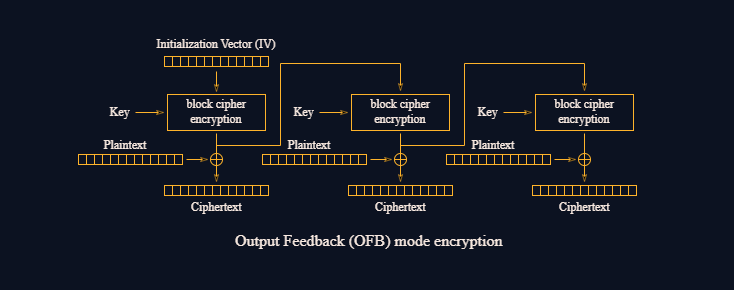

In [13]:
@chal.route('/symmetry/encrypt/<plaintext>/<iv>/')
def encrypt(plaintext, iv):
    plaintext = bytes.fromhex(plaintext)
    iv = bytes.fromhex(iv)
    if len(iv) != 16:
        return {"error": "IV length must be 16"}

    cipher = AES.new(KEY, AES.MODE_OFB, iv)
    encrypted = cipher.encrypt(plaintext)
    ciphertext = encrypted.hex()

    return {"ciphertext": ciphertext}


@chal.route('/symmetry/encrypt_flag/')
def encrypt_flag():
    iv = os.urandom(16)

    cipher = AES.new(KEY, AES.MODE_OFB, iv)
    encrypted = cipher.encrypt(FLAG.encode())
    ciphertext = iv.hex() + encrypted.hex()

    return {"ciphertext": ciphertext}

NameError: name 'chal' is not defined

In [ ]:
import requests
import os

BASE_URL = "https://aes.cryptohack.org/symmetry"

result = requests.get(BASE_URL+'/encrypt_flag')
print(result.json())
ciphertext = result.json()["ciphertext"]

iv = ciphertext[:32]
c = ciphertext[32:]
print(iv, c)

result = requests.get(f"{BASE_URL}/encrypt/{c}/{iv}")
print(result.json())
ciphertext = result.json()["ciphertext"]
print(bytes.fromhex(ciphertext))


{'ciphertext': '6482738b5e7f4dd2310a1839f656dce581da80490dfa688725b87c1fe73621bffd3e31517b8552693b1127336a52fc4024'}
6482738b5e7f4dd2310a1839f656dce5 81da80490dfa688725b87c1fe73621bffd3e31517b8552693b1127336a52fc4024
{'ciphertext': '63727970746f7b3066625f31355f35796d6d3337723163346c5f2121213131217d'}
b'crypto{0fb_15_5ymm37r1c4l_!!!11!}'


## Bean Counter

This challenge attempts to crack an ECB that has been converted to CTR.

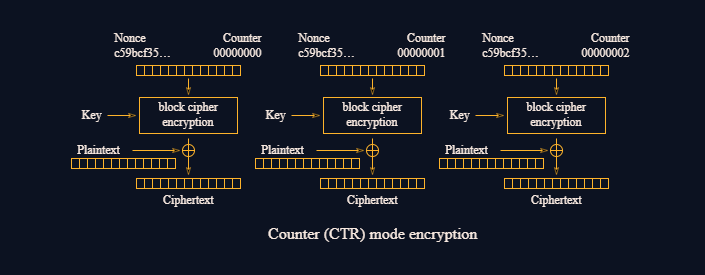

CTR mode is a block cipher encryption that transforms a block cipher into a stream cipher by generating a keystream using a counter that changes for each block.

### Process
1. **Initialization**: A unique IV is chosen for each encryption session.
2. **Keystream Generation**: The counter value is encrypted using the block cipher(e.g AES), producing a block of pseudorandom output called the _keystream_.
3. **Encryption**: The plaintext is XORed with the keystream block by block to produce a ciphertext.
4. **Decryption**: The ciphertext is XORed with the same keystream to recover the plaintext sinCE XOR is reversible.

In [ ]:
class StepUpCounter(object):
    def __init__(self, step_up=False):
        self.value = os.urandom(16).hex()
        self.step = 1
        self.stup = step_up

    def increment(self):
        if self.stup:
            self.newIV = hex(int(self.value, 16) + self.step)
        else:
            self.newIV = hex(int(self.value, 16) - self.stup)
        self.value = self.newIV[2:len(self.newIV)]
        return bytes.fromhex(self.value.zfill(32))

    def __repr__(self):
        self.increment()
        return self.value



@chal.route('/bean_counter/encrypt/')
def encrypt():
    cipher = AES.new(KEY, AES.MODE_ECB)
    ctr = StepUpCounter()

    out = []
    with open("challenge_files/bean_flag.png", 'rb') as f:
        block = f.read(16)
        while block:
            keystream = cipher.encrypt(ctr.increment())
            xored = [a^b for a, b in zip(block, keystream)]
            out.append(bytes(xored).hex())
            block = f.read(16)

    return {"encrypted": ''.join(out)}

### Current Implementation
The implementation given tries to relicate CTR mode by combining ECB with a custom counter with:
1. **Counter as input**: the counter value serves as the input for ECB encryption, mimicking the role of an IV combined with a counter in proper CTR.
2. **Keystream Generation**: Each call to `increment()` changes the counter value, which is then encrypted using ECB to produce a keystream block.
3. **Encryption**: each PT block is XORed with the corresponding keystream block just like standard CTR mode.

### Flaws in implementation
1. Logic may cause no potentially no counter increment when `self.stup=False`.
2. Reuse in counter values means that the same keystream can be applied to different PTs.
3. As ECB has a same input = same output rule, then if a counter value repeats, the keystream will also be repeated. 

### Attacking using known plaintext i.e the PNG header

1. **Compute IV**: XOR ciphertext start with known plaintext, in this case would be the PNG header.
2. **Decryption Loop**: iterate over the ciphertext in 16B blocks, extract PT by XOR with the IV derived then pad the final block
3. **Adjust key**: decrement key after each block as they were 'stepped up'
4. **Concatenate for result**: the decrypted blocks are put together for a final result 

In [ ]:
import requests

BASE_URL = "https://aes.cryptohack.org/bean_counter"

# Fetch the encrypted data
result = requests.get(BASE_URL + '/encrypt')
print(result.json())
c = result.json()["encrypted"]

# Known PNG header
known_plaintext = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  # PNG header
print(known_plaintext.hex())
known_plaintext = known_plaintext.hex()

# First block of ciphertext
c0 = c[:32]
key = int(c0, 16) ^ int(known_plaintext, 16)  # Derive the keystream
res = ""

# Loop through all blocks of ciphertext
for i in range(0, len(c), 32):
    c0 = c[i:i+32]
    # print(c0)
    # print(hex(key))

    if len(c0) == 32:
        # Full block
        decrypted_block = hex(int(c0, 16) ^ key)[2:].rjust(32, '0')
        res += decrypted_block
        # print(decrypted_block)
    else:
        # Partial block (final block)
        # print(len(c0))
        key0 = key // (16 ** (32 - len(c0)))
        # print(hex(key0))

        # Adjust width to match the length of the partial block
        decrypted_block = hex(int(c0, 16) ^ key0)[2:].rjust(len(c0), '0')
        res += decrypted_block
        # print(decrypted_block)

    # Adjust the key (simulating the counter decrement)
    key -= 1

print(res)
print(bytes.fromhex(res))
with open("decrypted_flag.png", "wb") as f:
    f.write(bytes.fromhex(res))



{'encrypted': 'b56de0a64d83386d7dfd0daf14c7c0c93c3dafcd4089221075fb0da25d36c7e6c93daef023f3763f09af6cd57dfff6f45a54c28460fd5b1718dd68da34e9849b44e76b782b1b0650f379f26574798ce7bd1d21a25229fbbb1d72b2bdff3ddef1751e7da9233fbffaf27787465eff3ca064b2510eff67d1588196b807fa060aa54772528af344909f4d2fda1da831624fe2ea59be79166d9e9a168248bac401d0a9ca5414a361bd8cb308cf5fb8fc79e781da6b94b95c62b44242d59da2edf99d16de9d20a773d52348824032638cbb700f6d837ed952f5a88696560b922e3b45fec4729e7f365da4bd0e84350b3af0726526014c645c1c9e41b767e881a392e173a45fdc9916a3198e0efedf36eec95e5793273651a28e38b238be1cf2c345743ba2e58cfc6fd8be4f2427ed7f57fde5fbc8611ebd50e8f8925872f0a3dccee440c7e34bfb751cb4b206864d0665eba9e842121ea17c0ed82182733f8fb8eb24a284d1dfd5168de8ec1342d9a341dea7d388df4e3f644cd2b36bf6c50e50dfe7034c716f2834fd8d4169aa064c4e0a5cd80c866843072ef710e32a6d01c767561166f01826f6fd2843d1bcb77245ffb29be9d2ff6e87b056b6549c7e4b00f810ea6423b5d7f3a2249897f413cb73caa0e3d4e0ff0ce55b5bddda3efabba47b73cdc13b7aae04a0ad449fd447d